# 数据分析师职位 分析

## 爬取数据

In [39]:
import requests
import json
import time
import pandas as pd

In [2]:
first_headers = {
    "Accept": "application/json, text/javascript, */*; q=0.01",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "zh-CN,en;q=0.7,en-US;q=0.3",
    "Connection": "keep-alive",
    "Referer": "https: //www.lagou.com/",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:80.0) Gecko/20100101 Firefox/80.0"
}

params = (
    ('labelWrods', ''),
    ('fromSearch', 'true'),
    ('suginput', ''),
)

s = requests.Session()
s.headers.update(first_headers)

first_url = 'https://www.lagou.com/jobs/list_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%B8%88'
resp = s.get(url=first_url, params=params)

In [5]:
resp.headers

{'Server': 'openresty', 'Date': 'Tue, 03 Nov 2020 09:07:51 GMT', 'Content-Type': 'text/html;charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'JSESSIONID=ABAAAECABFAACEADD5C9822622EDCF977551BC06B79334A; Path=/; HttpOnly, SEARCH_ID=abb41c3b950d4f7b873f5806079d624c; Version=1; Max-Age=86400; Expires=Wed, 04-Nov-2020 09:07:51 GMT; Path=/, user_trace_token=20201103170751-6664d243-c090-46e2-8df3-65dd2ff0dcde; Max-Age=31536000; Path=/; Domain=.lagou.com; , X_HTTP_TOKEN=42daf4b72327b2811744934061bf5e71415983ed09; Max-Age=31536000; Path=/; Domain=.lagou.com; ', 'REQUEST_ID': 'cc10277f-b97c-4688-9ac4-8fe023ef17a4', 'Content-Language': 'zh-CN', 'Cache-Control': 'no-cache', 'Content-Encoding': 'gzip'}

In [7]:
new_headers = {
    'Origin': 'https://www.lagou.com',
    'X-Anit-Forge-Code': '0',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:80.0) Gecko/20100101 Firefox/80.0',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Referer': 'https://www.lagou.com/jobs/list_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%B8%88/p-city_0?&cl=false&fromSearch=true&labelWords=&suginput=',
    'X-Requested-With': 'XMLHttpRequest',
    'X-Anit-Forge-Token': 'None',
}
new_url = 'https://www.lagou.com/jobs/positionAjax.json?needAddtionalResult=false'

In [8]:
data = {
    'first': 'true',
    'pn': 1,
    'kd': '数据分析师'
}

r = s.post(url=new_url, data=data, headers=new_headers)

In [20]:
json.loads(r.content).keys()

dict_keys(['success', 'msg', 'code', 'content', 'resubmitToken', 'requestId'])

In [24]:
json.loads(r.content)['content']['positionResult']['result'][0]

{'positionId': 7705703,
 'positionName': '高级/资深业务数据分析师',
 'companyId': 147,
 'companyFullName': '北京拉勾网络技术有限公司',
 'companyShortName': '拉勾网',
 'companyLogo': 'i/image2/M01/79/70/CgotOV1aS4qAWK6WAAAM4NTpXws809.png',
 'companySize': '500-2000人',
 'industryField': '企业服务',
 'financeStage': 'D轮及以上',
 'companyLabelList': ['五险一金', '弹性工作', '带薪年假', '免费两餐'],
 'firstType': '开发|测试|运维类',
 'secondType': '数据开发',
 'thirdType': '数据分析',
 'skillLables': ['Spark', 'python', 'R', '建业务分析模型'],
 'positionLables': ['教育', 'Spark', 'python', 'R', '建业务分析模型'],
 'industryLables': ['教育', 'Spark', 'python', 'R', '建业务分析模型'],
 'createTime': '2020-11-02 14:20:35',
 'formatCreateTime': '1天前发布',
 'city': '北京',
 'district': '海淀区',
 'businessZones': None,
 'salary': '20k-40k',
 'salaryMonth': '13',
 'workYear': '3-5年',
 'jobNature': '全职',
 'education': '本科',
 'positionAdvantage': '领导Nice，能力提升，团队氛围好，稳定职业',
 'imState': 'today',
 'lastLogin': '2020-11-03 16:41:49',
 'publisherId': 12369540,
 'approve': 1,
 'subwayline': '10号线',


In [32]:
all_df = pd.json_normalize(json.loads(r.content)['content']['positionResult']['result'])

In [33]:
all_df.columns

Index(['positionId', 'positionName', 'companyId', 'companyFullName',
       'companyShortName', 'companyLogo', 'companySize', 'industryField',
       'financeStage', 'companyLabelList', 'firstType', 'secondType',
       'thirdType', 'skillLables', 'positionLables', 'industryLables',
       'createTime', 'formatCreateTime', 'city', 'district', 'businessZones',
       'salary', 'salaryMonth', 'workYear', 'jobNature', 'education',
       'positionAdvantage', 'imState', 'lastLogin', 'publisherId', 'approve',
       'subwayline', 'stationname', 'linestaion', 'latitude', 'longitude',
       'distance', 'hitags', 'resumeProcessRate', 'resumeProcessDay', 'score',
       'newScore', 'matchScore', 'matchScoreExplain', 'query', 'explain',
       'isSchoolJob', 'adWord', 'plus', 'pcShow', 'appShow', 'deliver',
       'gradeDescription', 'promotionScoreExplain', 'isHotHire', 'count',
       'aggregatePositionIds', 'promotionType', 'is51Job', 'detailRecall',
       'famousCompany', 'hunterJob'],
   

In [34]:
all_df.head()

,positionId,positionName,companyId,companyFullName,companyShortName,companyLogo,companySize,industryField,financeStage,companyLabelList,...,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,promotionType,is51Job,detailRecall,famousCompany,hunterJob
0,7705703,高级/资深业务数据分析师,147,北京拉勾网络技术有限公司,拉勾网,i/image2/M01/79/70/CgotOV1aS4qAWK6WAAAM4NTpXws...,500-2000人,企业服务,D轮及以上,"[五险一金, 弹性工作, 带薪年假, 免费两餐]",...,None,None,0,0,[],None,False,False,True,False
1,7714883,02326I-数据分析师,140014,中国平安人寿保险股份有限公司,平安人寿,i/image2/M01/E5/1A/CgoB5lxzT4KAWIPDAACcCr0TFWI...,2000人以上,金融,上市公司,"[绩效奖金, 带薪年假, 定期体检, 节日礼物]",...,None,None,0,0,[],None,False,False,True,False
2,7672464,02324X-用户运营（数据分析方向）,140014,中国平安人寿保险股份有限公司,平安人寿,i/image2/M01/E5/1A/CgoB5lxzT4KAWIPDAACcCr0TFWI...,2000人以上,金融,上市公司,"[绩效奖金, 带薪年假, 定期体检, 节日礼物]",...,None,None,0,0,[],None,False,False,True,False
3,7049497,游戏数据分析,1880,北京达佳互联信息技术有限公司,快手,i/image/M00/49/E7/Ciqc1F9QZJSAC0VBAACwLdjC9yo4...,2000人以上,文娱丨内容,D轮及以上,"[股票期权, 弹性工作, 定期体检, 岗位晋升]",...,None,None,0,0,[],None,False,False,True,False
4,7873318,数据分析师,62,北京字节跳动科技有限公司,字节跳动,i/image2/M01/79/0A/CgoB5ltr2A-AM5SFAADbT9jQCn8...,2000人以上,文娱丨内容,C轮,"[扁平管理, 弹性工作, 大厨定制三餐, 就近租房补贴]",...,None,None,0,0,[],None,False,False,True,False


In [35]:
for i in range(2, 31, 1):
    data = {
        'first': 'false',
        'pn': i,
        'kd': '数据分析师'
        }
    r = s.post(url=new_url, data=data, headers=new_headers)
    df = pd.json_normalize(json.loads(r.content)['content']['positionResult']['result'])
    all_df = pd.concat([all_df, df], axis=0)
    time.sleep(30)

In [37]:
all_df.shape

(450, 62)

In [38]:
all_df.to_csv('./datas/jobs.csv')

## 数据清洗

In [1]:
import numpy as np
import pandas as pd

In [118]:
jobs_df = pd.read_csv('./datas/jobs.csv', index_col=0)

In [119]:
needed_col = ['positionName', 'companyShortName', 
              'companySize', 'industryField','financeStage',
              'companyLabelList', 'firstType', 'secondType',
              'thirdType', 'skillLables', 'positionLables', 
              'industryLables','city', 'district','salary',
              'salaryMonth', 'workYear', 'jobNature', 'education',
              'positionAdvantage', 'subwayline', 'stationname',
              'linestaion', 'latitude', 'longitude']
jobs_df = jobs_df[needed_col] # 保留必要字段

In [38]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 14
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   positionName       450 non-null    object 
 1   companyShortName   450 non-null    object 
 2   companySize        450 non-null    object 
 3   industryField      450 non-null    object 
 4   financeStage       450 non-null    object 
 5   companyLabelList   450 non-null    object 
 6   firstType          450 non-null    object 
 7   secondType         450 non-null    object 
 8   thirdType          450 non-null    object 
 9   skillLables        450 non-null    object 
 10  positionLables     450 non-null    object 
 11  industryLables     450 non-null    object 
 12  city               450 non-null    object 
 13  district           447 non-null    object 
 14  salary             450 non-null    object 
 15  salaryMonth        450 non-null    int64  
 16  workYear           450 non-

In [37]:
jobs_df.head()

,positionName,companyShortName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,...,salaryMonth,workYear,jobNature,education,positionAdvantage,subwayline,stationname,linestaion,latitude,longitude
0,高级/资深业务数据分析师,拉勾网,500-2000人,企业服务,D轮及以上,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,数据开发,数据分析,"['Spark', 'python', 'R', '建业务分析模型']",...,13,3-5年,全职,本科,领导Nice，能力提升，团队氛围好，稳定职业,10号线,中关村,4号线大兴线_海淀黄庄;4号线大兴线_中关村;4号线大兴线_北京大学东门;10号线_苏州街;...,39.982128,116.307747
1,02326I-数据分析师,平安人寿,2000人以上,金融,上市公司,"['绩效奖金', '带薪年假', '定期体检', '节日礼物']",产品|需求|项目类,数据分析,BI,"['数据库', '商业', 'BI', '数据分析']",...,0,1-3年,全职,本科,"五险一金,带薪年假,定期体检,免费班车",NaN,NaN,NaN,31.238157,121.666906
2,02324X-用户运营（数据分析方向）,平安人寿,2000人以上,金融,上市公司,"['绩效奖金', '带薪年假', '定期体检', '节日礼物']",运营|编辑|客服类,运营,数据运营,[],...,0,1-3年,全职,本科,"五险一金,带薪年假,定期体检,免费班车",NaN,NaN,NaN,31.238157,121.666906
3,游戏数据分析,快手,2000人以上,文娱丨内容,D轮及以上,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,[],...,0,3-5年,全职,本科,福利完善,昌平线,西二旗,13号线_西二旗;昌平线_西二旗,40.053389,116.298440
4,数据分析师,字节跳动,2000人以上,文娱丨内容,C轮,"['扁平管理', '弹性工作', '大厨定制三餐', '就近租房补贴']",产品|需求|项目类,数据分析,数据分析,[],...,0,1-3年,全职,本科,"免费三餐,带薪休假,弹性工作,六险一金",10号线,知春路,4号线大兴线_人民大学;4号线大兴线_海淀黄庄;10号线_海淀黄庄;10号线_知春里;10号...,39.971819,116.328708


In [110]:
jobs_df.iloc[0]['skillLables']

"['Spark', 'python', 'R', '建业务分析模型']"

In [145]:
import re
# lambda x: x[1:-1] if len(x) > 2 else ''
def to_list_step_1st(x):
    if len(x) > 2:
        return x[1:-1]
    else:
        return '数据分析' # 默认需 数据分析
# lambda x: list(set(filter(None, re.sub('\'| ', '', x).split(','))))
def to_list_step_2nd(x):
    l = re.sub("'| ", '', x).split(',')
    filtered_l = filter(None, l)
    return list(set(filtered_l))

In [146]:
# 合并 技能、职能、行业 字段
jobs_df['neededSkills'] = (jobs_df['skillLables'].apply(to_list_step_1st) + ',' + 
                           jobs_df['positionLables'].apply(to_list_step_1st) + ',' +
                           jobs_df['industryLables'].apply(to_list_step_1st)).apply(to_list_step_2nd)

In [158]:
# 删除字段
jobs_df.drop(['skillLables', 'positionLables', 'industryLables'], axis=1, inplace=True)
jobs_df.drop(['subwayline', 'stationname', 'linestaion'], axis=1, inplace=True)

In [161]:
jobs_df['district'] = jobs_df['district'].fillna('未知')

In [163]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 14
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   positionName       450 non-null    object 
 1   companyShortName   450 non-null    object 
 2   companySize        450 non-null    object 
 3   industryField      450 non-null    object 
 4   financeStage       450 non-null    object 
 5   companyLabelList   450 non-null    object 
 6   firstType          450 non-null    object 
 7   secondType         450 non-null    object 
 8   thirdType          450 non-null    object 
 9   city               450 non-null    object 
 10  district           450 non-null    object 
 11  salary             450 non-null    object 
 12  salaryMonth        450 non-null    int64  
 13  workYear           450 non-null    object 
 14  jobNature          450 non-null    object 
 15  education          450 non-null    object 
 16  positionAdvantage  450 non-

In [282]:
# 保存清洗过数据
jobs_df.to_csv('./datas/cleaned_jobs.csv', float_format='%.6f')

## 数据分析

In [19]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
cleaned_df = pd.read_csv('./datas/cleaned_jobs.csv', index_col=0)

In [171]:
cleaned_df.head()

,positionName,companyShortName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,city,district,salary,salaryMonth,workYear,jobNature,education,positionAdvantage,latitude,longitude,neededSkills
0,高级/资深业务数据分析师,拉勾网,500-2000人,企业服务,D轮及以上,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,数据开发,数据分析,北京,海淀区,20k-40k,13,3-5年,全职,本科,领导Nice，能力提升，团队氛围好，稳定职业,39.982128,116.307747,"['python', 'R', 'Spark', '建业务分析模型', '教育']"
1,02326I-数据分析师,平安人寿,2000人以上,金融,上市公司,"['绩效奖金', '带薪年假', '定期体检', '节日礼物']",产品|需求|项目类,数据分析,BI,上海,浦东新区,12k-22k,0,1-3年,全职,本科,"五险一金,带薪年假,定期体检,免费班车",31.238157,121.666906,"['数据库', '保险', '数据分析', '互联网金融', '商业', 'BI']"
2,02324X-用户运营（数据分析方向）,平安人寿,2000人以上,金融,上市公司,"['绩效奖金', '带薪年假', '定期体检', '节日礼物']",运营|编辑|客服类,运营,数据运营,上海,浦东新区,10k-20k,0,1-3年,全职,本科,"五险一金,带薪年假,定期体检,免费班车",31.238157,121.666906,"['保险', '互联网金融', '数据分析']"
3,游戏数据分析,快手,2000人以上,文娱丨内容,D轮及以上,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,北京,海淀区,15k-30k,0,3-5年,全职,本科,福利完善,40.053389,116.298440,['数据分析']
4,数据分析师,字节跳动,2000人以上,文娱丨内容,C轮,"['扁平管理', '弹性工作', '大厨定制三餐', '就近租房补贴']",产品|需求|项目类,数据分析,数据分析,北京,海淀区,15k-30k,0,1-3年,全职,本科,"免费三餐,带薪休假,弹性工作,六险一金",39.971819,116.328708,['数据分析']


In [170]:
cleaned_df.columns

Index(['positionName', 'companyShortName', 'companySize', 'industryField',
       'financeStage', 'companyLabelList', 'firstType', 'secondType',
       'thirdType', 'city', 'district', 'salary', 'salaryMonth', 'workYear',
       'jobNature', 'education', 'positionAdvantage', 'latitude', 'longitude',
       'neededSkills'],
      dtype='object')

#### 各城市对数据分析岗位的需求量

In [3]:
sorted_city = cleaned_df['city'].value_counts().sort_values(ascending=False)[:10] # 获取 前 10 城市 数据分析岗位需求

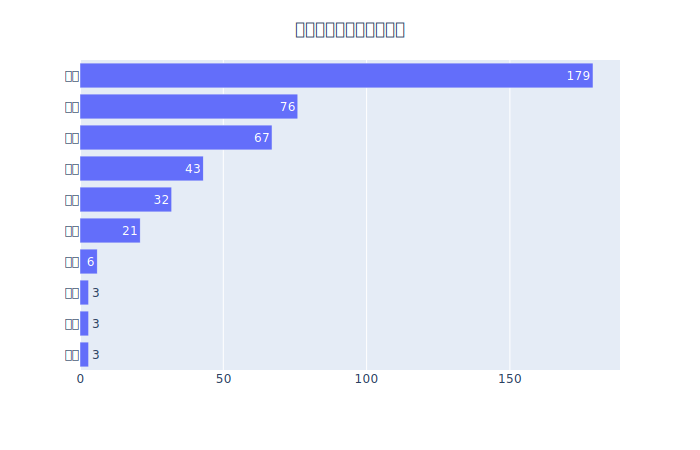

In [20]:
fig = px.bar(sorted_city, x=sorted_city.values, y=sorted_city.index, text=sorted_city.values)
fig.update_layout(
    title={
        'text': '各城市数据分析岗位需求',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis={
        'title': None,
    },
    yaxis={
        'autorange': 'reversed',
        'title': None,
    }
)
fig.update_traces(hovertemplate='<br>城市: %{y} </br> %{x}')
fig.show("svg")

从招聘信息的所在地来看，对数据分析岗位需求量较大的是北上深广等一线城市，除了北上广深和杭州外，其他热门城市需求量不大，所以需要找分析相关的工作，最好还是到一线城市寻找机会。

#### 不同行业对数据分析岗位的需求量

In [12]:
# 拆分 industryField 字段列，以获取 细分行业
industry = cleaned_df['industryField'].str.split(',', expand=True).stack()
sorted_industry = industry.value_counts().sort_values(ascending=False)[:10] # 获取 前 10 行业 数据分析岗位需求

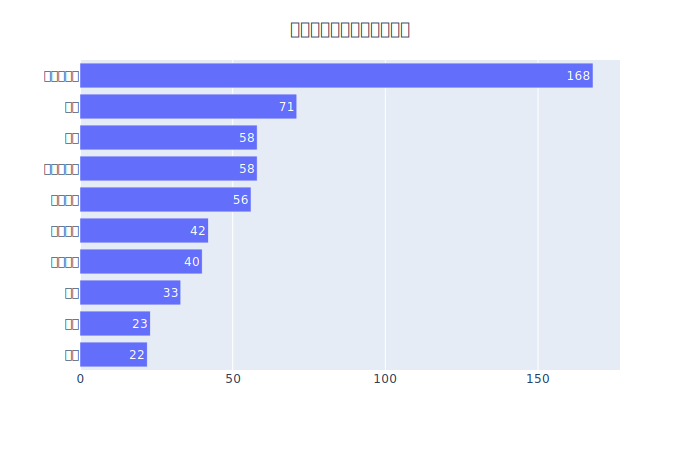

In [21]:
fig = px.bar(sorted_industry, x=sorted_industry.values, y=sorted_industry.index, text=sorted_industry.values)
fig.update_layout(
    title={
        'text': '不同行业数据分析岗位需求',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis={
        'title': None,
    },
    yaxis={
        'autorange': 'reversed',
        'title': None,
    }
)
fig.update_traces(hovertemplate='<br>行业: %{y} </br> %{x}')
fig.show("svg")

从行业纬度上看，移动互联网势头仍然不弱，当前位列头部远超其他领域\[这与当前智能手机发展密切相关\]；金融、电商、文娱和数据服务等需求也不弱，消费生活、企业服务也存在不少的机会。

#### 各城市数据分析岗位的薪资状况

In [14]:
def get_mean_salary(x):
    s_min, s_max = x.split('-')
    s_min = int(s_min.replace('k', '000'))
    s_max = int(s_max.replace('k', '000'))
    return np.mean([s_min, s_max])

In [15]:
# 获取 该职位薪资范围内 中值
cleaned_df['salary'] = cleaned_df['salary'].apply(get_mean_salary)

In [16]:
city_salary = cleaned_df[cleaned_df['jobNature'] == '全职'][['city', 'salary']].sort_values(by='salary', ascending=False)

In [17]:
 city_salary = city_salary[city_salary['city'].isin(['北京', '上海', '深圳', '广州', '杭州', '成都', '重庆', '佛山', '南京', '宁波'])]

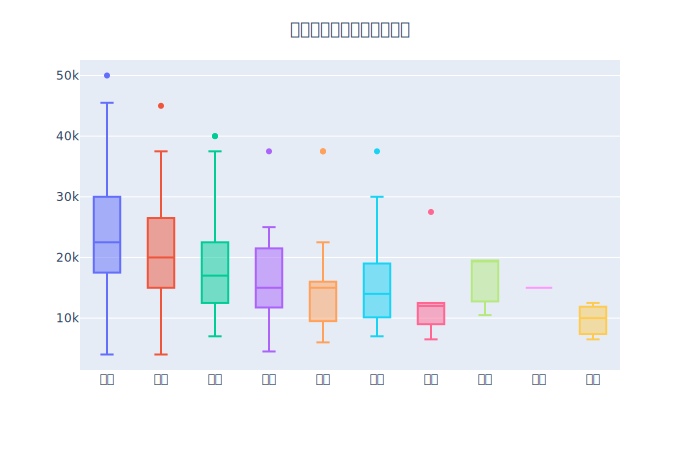

In [22]:
fig = px.box(city_salary, x='city', y='salary', color='city')
fig.update_layout(
    title={
        'text': '各城市的薪资水平分布比对',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis={
        'title': None,
    },
    yaxis={
        'title': None,
    },
    showlegend=False
)
fig.show("svg")

从各城市的薪资水平分布来看，北京、上海、深圳、杭州属于第一梯队，成都、广州位列第二梯队，\[其他城市数据样本少不做分析\]


#### 哪些行业更需要数据分析人才，薪资如何？

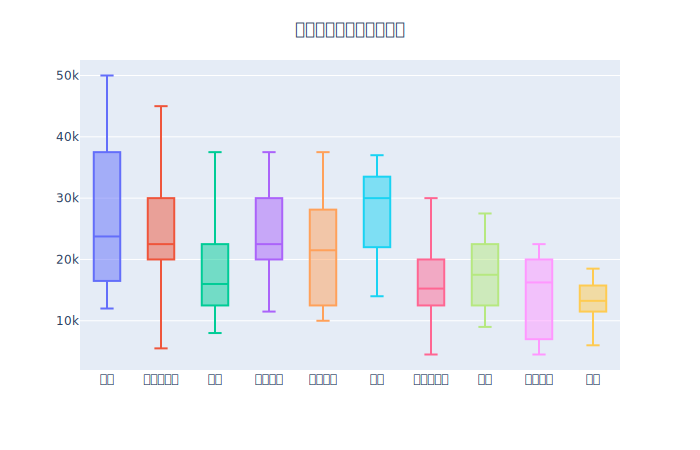

In [23]:
industry_salary = cleaned_df[cleaned_df['jobNature'] == '全职'][['industryField', 'salary']].sort_values(by='salary', ascending=False)
industry_salary = industry_salary[industry_salary['industryField'].isin(['移动互联网', '金融', '电商', '文娱丨内容', '数据服务', '消费生活', '企业服务', '游戏', '社交', '教育'])]

fig = px.box(industry_salary, x='industryField', y='salary', color='industryField')
fig.update_layout(
    title={
        'text': '各行业薪资水平分布比对',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis={
        'title': None,
    },
    yaxis={
        'title': None,
    },
    showlegend=False
)
fig.show("svg")

从各行业的薪资分布来看，移动互联网的整体薪资水平维持在 12k-20k，中位数15.25k，与金融、电商行业相差无几；疫情期间，线上教育、文娱｜内容 火爆，数据分析岗位需求果然系求贤若渴啊，给出的薪资很是不错。

#### 大公司 OR 小公司？

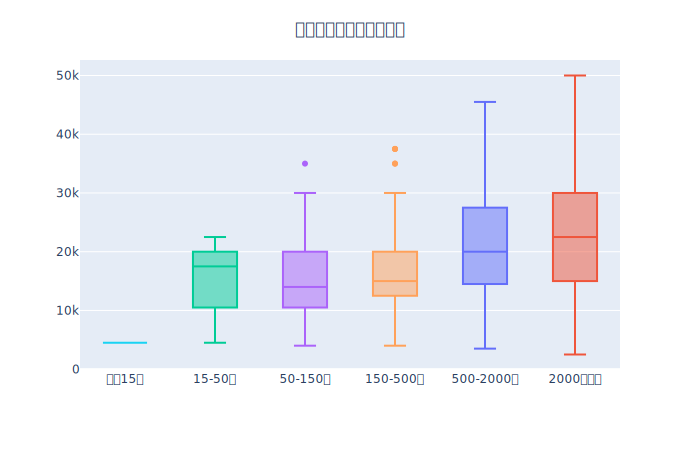

In [24]:
fig = px.box(cleaned_df, x='companySize', y='salary', color='companySize')
fig.update_layout(
    title={
        'text': '公司规模的薪资水平比对',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis={
        'title': None,
        'categoryarray': [u'少于15人',u'15-50人',u'50-150人',u'150-500人',u'500-2000人',u'2000人以上']
    },
    yaxis={
        'title': None,
    },
    showlegend=False
)
fig.show("svg")

大公司更加稳定、制度健全，但是相对于小公司的自由度、晋升空间确实是少了点；
从公司规模的薪资水平分布来看，大公司更愿给出高薪资，小公司也愿意给出10k-20k的薪资。

#### 目前数据分析师岗位要求的工作经验和学历是怎样的？

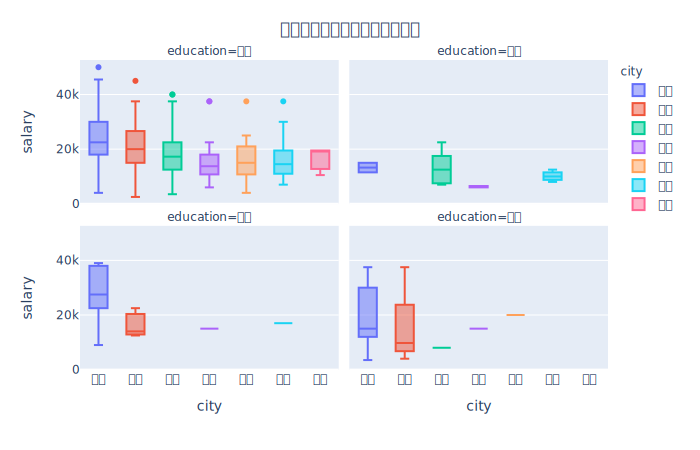

In [25]:
edu_d = cleaned_df[['city', 'salary', 'education']][cleaned_df['city'].isin(['北京', '上海', '深圳', '广州', '杭州', '成都', '佛山'])]
fig = px.box(edu_d, x='city', y='salary', color='city', facet_col='education', facet_col_wrap=2)
fig.update_layout(
    title={
        'text': '不同学历在城市的薪资水平比对',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
)
fig.show("svg")

从不同学历在不同城市的薪资比对，本科成了数据分析师的基本门槛；
在要求是硕士的，薪资领先的是 北京/上海；深圳/广州等近期需求不大，数据不足。

#### 工作年限与薪资，我没拖后腿吧？

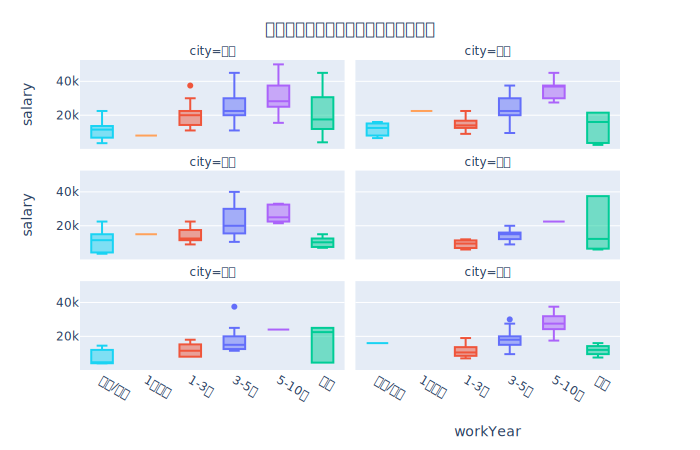

In [26]:
work_y = cleaned_df[['city', 'salary', 'workYear']][cleaned_df['city'].isin(['北京', '上海', '深圳', '广州', '杭州', '成都'])]

fig = px.box(work_y, x='workYear', y='salary', color='workYear', facet_col='city', facet_col_wrap=2)
fig.update_layout(
    title={
        'text': '工作年限在不同的城市的薪资水平比对',
        'y': 0.95,
        'x': 0.50,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis={
        'title': None,
        'categoryarray': [u'在校/应届',u'1年以下',u'1-3年',u'3-5年',u'5-10年',u'不限']
    },
    yaxis={
        'title': None,
    },
    showlegend=False
)
fig.show("svg")

从工作年限来看，都是整体上升阶段，3-5年会有较大的涨幅

In [92]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud

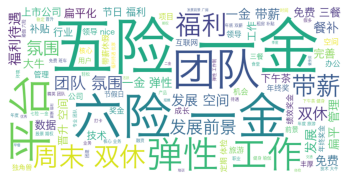

In [104]:
text_c = ' '.join(cleaned_df['positionAdvantage'])
cut_text = ' '.join(jieba.cut(text_c, cut_all=False, HMM=True))
wc = WordCloud(
        font_path='/System/Library/Fonts/Hiragino Sans GB.ttc',
        background_color='#FFFFFF',
        scale=2,
        max_words=100,
        )
wordcloud = wc.generate(cut_text)
wordcloud.to_file('./output/公司福利.png')
plt.imshow(wordcloud)
plt.axis('off') # 不显示坐标
plt.show()

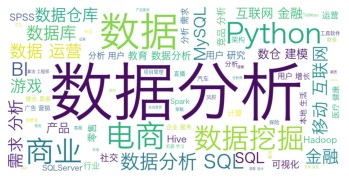

In [105]:
import re

text_s = ' '.join(cleaned_df['neededSkills'])
text_s_r = re.sub(r'\[|\]', '', text_s)
cut_text = ' '.join(jieba.cut(text_s_r, cut_all=False, HMM=True))
wc = WordCloud(
        font_path='/System/Library/Fonts/Hiragino Sans GB.ttc',
        background_color='#FFFFFF',
        scale=2,
        max_words=100,
        )
wordcloud = wc.generate(cut_text)
wordcloud.to_file('./ouput/公司技能需求.png')
plt.imshow(wordcloud)
plt.axis('off') # 不显示坐标
plt.show()

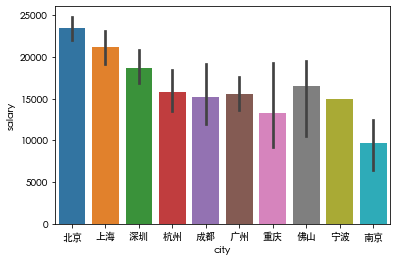

In [35]:
'''
seaborn 可视化 各城市的薪资水平对比
'''
import seaborn as sns
import matplotlib.pyplot as plt

# 设置plt，正确显示中文
plt.rcParams['font.family']='Heiti TC'
plt.rcParams['axes.unicode_minus']=False

ax = sns.barplot(data=city_salary, x='city', y='salary')

### PS：尝试使用 [高德可视化平台](https://maplab.amap.com/)

In [366]:
# 简单处理 所需 依赖数据
geo = pd.DataFrame({})
geo['公司'] = cleaned_df['companyShortName']
geo['经纬度'] = cleaned_df['longitude'].apply(lambda x: f'{x:.6f}') + ',' + cleaned_df['latitude'].apply(lambda x: f'{x:.6f}')
geo.to_csv('./datas/cp_geo.csv', encoding='utf-8-sig', index=False)

<iframe src="https://maplab.amap.com/share/mapv/1ff14ef69881e6885fbe390a723eff88" width="100%" height="600px" scrolling="auto"></iframe>
        